In [68]:
import seaborn as sns               #plotting
import numpy as np                  #math/array/sums
import matplotlib.pyplot as plt     #plotting... .pyplot is the plotting interface
import matplotlib.lines as lines    #to create lines on the plot... .lines
import pandas as pd                 #reading/manipulating tables

In [69]:
#import csv
#define filepath/name
filepath = 'D:/visualization/02_activities/assignments/A3_TorontoMarriageLicenceStatisticsData_csv.csv'

#load csv into dataframe
df = pd.read_csv(filepath)
print(df.head())    #verify import


     _id CIVIC_CENTRE  MARRIAGE_LICENSES TIME_PERIOD MONTH  YEAR
0  24901           ET                 80      Jan-11   Jan  2011
1  24902           NY                136      Jan-11   Jan  2011
2  24903           SC                159      Jan-11   Jan  2011
3  24904           TO                367      Jan-11   Jan  2011
4  24905           ET                109      Feb-11   Feb  2011


In [70]:
#create individual datasets for each Civic Centre -  use .copy() so that you're not working on the major DF

df_ET = df[df['CIVIC_CENTRE'] == 'ET'].copy() #creating dataframe for ET only
df_NY = df[df['CIVIC_CENTRE'] == 'NY'].copy() #creating dataframe for NY only
df_SC = df[df['CIVIC_CENTRE'] == 'SC'].copy() #creating dataframe for SC only
df_TO = df[df['CIVIC_CENTRE'] == 'TO'].copy() #creating dataframe for TO only

In [71]:
#pivot tables

#define full year range...because some of your plots only go upto 2021
full_years = list(range(2011, 2027))

#pd.Categorical = set the MONTH column to follow this order with...otherwise it automatically arranges MONTH alphabetically
#.pivot = pivot tables to that row/index=MONTH and column=YEAR and values=MARRIAGE_LICENSES
#.reindex = to have all years present in all dataframes
#pivot ET
df_ET['MONTH'] = pd.Categorical(df_ET['MONTH'], 
                                categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                ordered=True)
pivoted_df_ET = (df_ET
                 .pivot(index='MONTH', columns='YEAR', values='MARRIAGE_LICENSES')
                 .reindex(columns=full_years))

#pivot NY
df_NY['MONTH'] = pd.Categorical(df_NY['MONTH'], 
                                categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                ordered=True)
pivoted_df_NY = (df_NY
                 .pivot(index='MONTH', columns='YEAR', values='MARRIAGE_LICENSES')
                 .reindex(columns=full_years))

#pivot SC
df_SC['MONTH'] = pd.Categorical(df_SC['MONTH'], 
                                categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                ordered=True)
pivoted_df_SC = (df_SC
                 .pivot(index='MONTH', columns='YEAR', values='MARRIAGE_LICENSES')
                 .reindex(columns=full_years))

#pivot TO
df_TO['MONTH'] = pd.Categorical(df_TO['MONTH'], 
                                categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
                                ordered=True)
pivoted_df_TO = (df_TO
                 .pivot(index='MONTH', columns='YEAR', values='MARRIAGE_LICENSES')
                 .reindex(columns=full_years))

In [72]:
#check
print(pivoted_df_TO)

YEAR    2011   2012   2013    2014    2015    2016    2017    2018    2019  \
MONTH                                                                        
Jan    367.0  440.0  365.0   375.0   327.0   346.0   347.0   375.0   341.0   
Feb    383.0  390.0  346.0   364.0   333.0   364.0   357.0   344.0   382.0   
Mar    589.0  567.0  455.0   530.0   559.0   517.0   608.0   538.0   576.0   
Apr    660.0  561.0  666.0   674.0   665.0   695.0   627.0   657.0   724.0   
May    871.0  807.0  748.0   847.0   805.0   895.0   894.0   880.0   879.0   
Jun    870.0  888.0  778.0   942.0   927.0  1071.0   943.0   964.0   901.0   
Jul    989.0  971.0  972.0  1024.0  1090.0  1041.0   971.0  1090.0  1079.0   
Aug    965.0  980.0  931.0   967.0   930.0  1072.0  1066.0  1117.0  1011.0   
Sep    638.0  563.0  607.0   658.0   713.0   656.0   729.0   719.0   738.0   
Oct    468.0  486.0  448.0   489.0   478.0   489.0   552.0   582.0   576.0   
Nov    340.0  391.0  315.0   347.0   342.0   388.0   393.0   397

Text(0.33, 0.15, '*Scarborough only has\ndata uptil 2021')

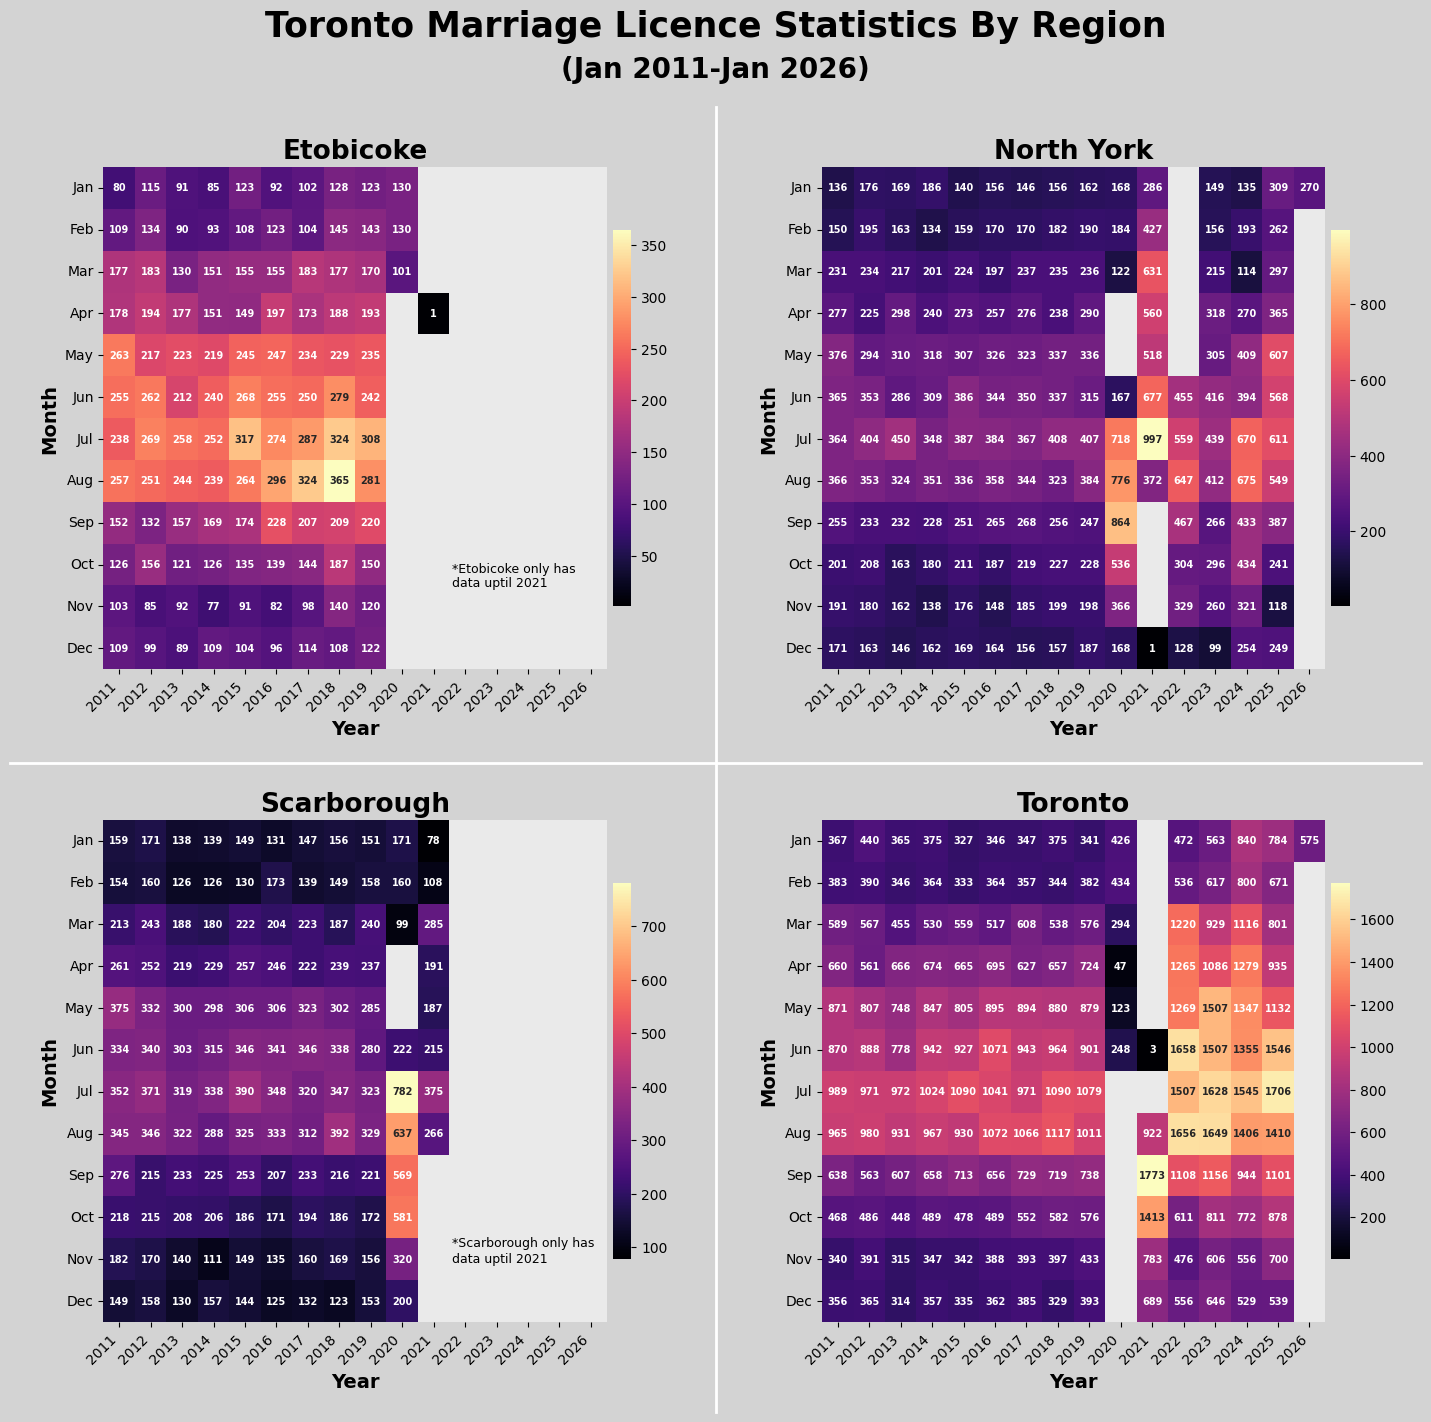

In [73]:
#set plot area parameters...2x2, 4 graphs total
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(17, 15), constrained_layout=False) #constrained_layout=False because I'm setting the spacing manually
ax1, ax2, ax3, ax4 = axes.flatten()  # turns 2x2 array into 1D array
plt.subplots_adjust(wspace=0.2, hspace=0.3) # adjust space between each subplot

#set figure title
fig.patch.set_facecolor('#d3d3d3')
fig.suptitle( 
    'Toronto Marriage Licence Statistics By Region',
    x=0.485, y=0.985,
    fontsize=25,
    fontweight='bold') #set overall figure title
fig.text( 
    0.485, 0.94,
    '(Jan 2011-Jan 2026)',
    ha='center',
    fontsize=20,
    fontweight='bold') #set the subtitle - x=0.485, y=0.94

#set heatmap min/max so all heatmaps have same legend/distribution
#did not use here because TO is leagues above the others, but if I did use, would need to change the code to: sns.heatmap(pivoted_df_ET, ax=ax1, vmin=global_min, vmax=global_max, annot=True, cmap='YlGnBu')..or whatever colour palate I'm using
global_min = 0
global_max = df['MARRIAGE_LICENSES'].max()

#fmt = format force into integers, annot_kws = annotation size & bold
#set graph for ET into ax1
sns.heatmap(pivoted_df_ET, ax=ax1, annot=True, cmap='magma', fmt='.0f', annot_kws={'size':7, 'weight':'bold'},
            cbar_kws={'shrink':0.75, 'pad':0.01})
ax1.set_title('Etobicoke', fontsize=19, fontweight='bold')

#set graph for NY into ax2
sns.heatmap(pivoted_df_NY, ax=ax2, annot=True, cmap='magma', fmt='.0f', annot_kws={'size':7, 'weight':'bold'},
            cbar_kws={'shrink':0.75, 'pad':0.01})
ax2.set_title('North York', fontsize=19, fontweight='bold')

#set graph for SC into ax3
sns.heatmap(pivoted_df_SC, ax=ax3, annot=True, cmap='magma', fmt='.0f', annot_kws={'size':7, 'weight':'bold'},
            cbar_kws={'shrink':0.75, 'pad':0.01})
ax3.set_title('Scarborough', fontsize=19, fontweight='bold')

#set graph for TO into ax4
sns.heatmap(pivoted_df_TO, ax=ax4, annot=True, cmap='magma', fmt='.0f', annot_kws={'size':7, 'weight':'bold'},
            cbar_kws={'shrink':0.75, 'pad':0.01})
ax4.set_title('Toronto', fontsize=19, fontweight='bold')

#set subplot axes
for ax in [ax1, ax2, ax3, ax4]:
    ax.set_xlabel('Year', fontsize=14, fontweight='bold') #x-axis name and font
    ax.set_ylabel('Month', fontsize=14, fontweight='bold')#y-axis name and font
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') #x-axis label horizontal rotated
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0) #y-axis label to horitonzal ... 0° = horizontal
    ax.patch.set_facecolor("#eaeaea") #plot area colour to grey

# Add a vertical line in the middle of the figure
# x coordinates (0.48, 0.48) span the center; y coordinates (0.05, 0.92) span the plot area vertically
vline = lines.Line2D([0.485, 0.485], [0.05, 0.92], transform=fig.transFigure, color='#ffffff', linestyle='-', linewidth=2, clip_on=False)
fig.add_artist(vline)

# Add a horizontal line in the middle of the figure
# x coordinates (0.07, 0.9) span the plot area horizontally; y coordinates (0.485, 0.485) span the center
hline = lines.Line2D([0.07, 0.9], [0.483, 0.483], transform=fig.transFigure, color='#ffffff', linestyle='-', linewidth=2, clip_on=False)
fig.add_artist(hline)

#figure notes
fig.text( 
    0.33, 0.6,
    '*Etobicoke only has\ndata uptil 2021',
    fontsize=9)
fig.text( 
    0.33, 0.15,
    '*Scarborough only has\ndata uptil 2021',
    fontsize=9)